# 1. MNLIProcessor 클래스 구현

In [1]:
import tensorflow_datasets as tfds

class MNLIProcessor:
    def __init__(self):
        self.dataset, self.info = tfds.load('glue/mnli', with_info=True)
    
    def get_examples(self, split):
        return tfds.as_numpy(self.dataset[split])
    
    def get_labels(self):
        return ['entailment', 'neutral', 'contradiction']
    
    def _create_examples(self, examples, set_type):
        examples_list = []
        for example in examples:
            guid = f"{set_type}-{example['idx']}"
            text_a = example['premise'].decode('utf-8')
            text_b = example['hypothesis'].decode('utf-8')
            label = example['label']
            examples_list.append({
                'guid': guid,
                'text_a': text_a,
                'text_b': text_b,
                'label': label
            })
        return examples_list

# 2. BERT Tokenizer와 Processor 이용한 데이터셋 생성

In [2]:
!pip show transformers

Name: transformers
Version: 4.11.3
Summary: State-of-the-art Natural Language Processing for TensorFlow 2.0 and PyTorch
Home-page: https://github.com/huggingface/transformers
Author: Thomas Wolf, Lysandre Debut, Victor Sanh, Julien Chaumond, Sam Shleifer, Patrick von Platen, Sylvain Gugger, Suraj Patil, Stas Bekman, Google AI Language Team Authors, Open AI team Authors, Facebook AI Authors, Carnegie Mellon University Authors
Author-email: thomas@huggingface.co
License: Apache
Location: /opt/conda/lib/python3.9/site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, sacremoses, tokenizers, tqdm
Required-by: 


In [3]:
from transformers import BertTokenizer
import tensorflow as tf

class MNLIProcessor:
    def __init__(self):
        self.dataset, self.info = tfds.load('glue/mnli', with_info=True)
    
    def get_examples(self, split):
        return tfds.as_numpy(self.dataset[split])
    
    def get_labels(self):
        return ['entailment', 'neutral', 'contradiction']
    
    def _create_examples(self, examples, set_type):
        examples_list = []
        for example in examples:
            guid = f"{set_type}-{example['idx']}"
            text_a = example['premise'].decode('utf-8')
            text_b = example['hypothesis'].decode('utf-8')
            label = example['label']
            examples_list.append({
                'guid': guid,
                'text_a': text_a,
                'text_b': text_b,
                'label': label
            })
        return examples_list

def encode(examples, tokenizer, max_length=128):
    input_ids = []
    attention_masks = []
    token_type_ids = []
    labels = []

    for example in examples:
        encoded = tokenizer.encode_plus(
            text=example['text_a'],
            text_pair=example['text_b'],
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_token_type_ids=True
        )

        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
        token_type_ids.append(encoded['token_type_ids'])
        labels.append(example['label'])

    return {
        'input_ids': tf.convert_to_tensor(input_ids),
        'attention_mask': tf.convert_to_tensor(attention_masks),
        'token_type_ids': tf.convert_to_tensor(token_type_ids),
        'labels': tf.convert_to_tensor(labels)
    }

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

processor = MNLIProcessor()
train_examples = processor._create_examples(processor.get_examples('train'), 'train')

train_dataset = encode(train_examples, tokenizer)

encoded = tokenizer.encode_plus(
    text=example['text_a'],
    text_pair=example['text_b'],
    add_special_tokens=True,
    max_length=128,
    padding='max_length',
    truncation='only_first',
    return_attention_mask=True,
    return_token_type_ids=True,
    return_overflowing_tokens=True
)

INFO:absl:Load dataset info from /aiffel/tensorflow_datasets/glue/mnli/2.0.0
INFO:absl:Reusing dataset glue (/aiffel/tensorflow_datasets/glue/mnli/2.0.0)
INFO:absl:Constructing tf.data.Dataset glue for split None, from /aiffel/tensorflow_datasets/glue/mnli/2.0.0
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setti

NameError: name 'example' is not defined

In [4]:
example = {
    'text_a': "This is a sample premise that might be too long for the model to handle properly.",
    'text_b': "This is the hypothesis that we are trying to test."
}

encoded = tokenizer.encode_plus(
    text=example['text_a'],
    text_pair=example['text_b'],
    add_special_tokens=True,
    max_length=128,
    padding='max_length',
    truncation='only_first',
    return_attention_mask=True,
    return_token_type_ids=True,
    return_overflowing_tokens=True
)

print(f"Input IDs: {encoded['input_ids']}")
print(f"Overflowing Tokens: {encoded.get('overflowing_tokens', [])}")

Input IDs: [101, 2023, 2003, 1037, 7099, 18458, 2008, 2453, 2022, 2205, 2146, 2005, 1996, 2944, 2000, 5047, 7919, 1012, 102, 2023, 2003, 1996, 10744, 2008, 2057, 2024, 2667, 2000, 3231, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Overflowing Tokens: []


In [5]:
# 테스트
example = {
    'text_a': "This is a sample premise that is intentionally made very long to trigger truncation. " * 10,
    'text_b': "This is the hypothesis that we are trying to test with a similarly long sequence. " * 5
}

encoded = tokenizer.encode_plus(
    text=example['text_a'],
    text_pair=example['text_b'],
    add_special_tokens=True,
    max_length=128,
    padding='max_length',
    truncation='only_first',
    return_attention_mask=True,
    return_token_type_ids=True,
    return_overflowing_tokens=True
)

print(f"Input IDs: {encoded['input_ids']}")
print(f"Overflowing Tokens: {encoded.get('overflowing_tokens', [])}")

Input IDs: [101, 2023, 2003, 1037, 7099, 18458, 2008, 2003, 15734, 2081, 2200, 2146, 2000, 9495, 19817, 4609, 10719, 1012, 2023, 2003, 1037, 7099, 18458, 2008, 2003, 15734, 2081, 2200, 2146, 2000, 9495, 19817, 4609, 10719, 1012, 2023, 2003, 1037, 7099, 18458, 2008, 2003, 15734, 2081, 2200, 2146, 102, 2023, 2003, 1996, 10744, 2008, 2057, 2024, 2667, 2000, 3231, 2007, 1037, 6660, 2146, 5537, 1012, 2023, 2003, 1996, 10744, 2008, 2057, 2024, 2667, 2000, 3231, 2007, 1037, 6660, 2146, 5537, 1012, 2023, 2003, 1996, 10744, 2008, 2057, 2024, 2667, 2000, 3231, 2007, 1037, 6660, 2146, 5537, 1012, 2023, 2003, 1996, 10744, 2008, 2057, 2024, 2667, 2000, 3231, 2007, 1037, 6660, 2146, 5537, 1012, 2023, 2003, 1996, 10744, 2008, 2057, 2024, 2667, 2000, 3231, 2007, 1037, 6660, 2146, 5537, 1012, 102]
Overflowing Tokens: [2000, 9495, 19817, 4609, 10719, 1012, 2023, 2003, 1037, 7099, 18458, 2008, 2003, 15734, 2081, 2200, 2146, 2000, 9495, 19817, 4609, 10719, 1012, 2023, 2003, 1037, 7099, 18458, 2008, 2003, 

# 3. Model 생성 및 학습

In [7]:
from transformers import TFBertForSequenceClassification, BertConfig

# BERT 모델 구성
config = BertConfig.from_pretrained('bert-base-uncased', num_labels=3)
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', config=config)

# 모델 컴파일
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# 모델 학습
model.fit(
    x={
        'input_ids': train_dataset['input_ids'],
        'attention_mask': train_dataset['attention_mask'],
        'token_type_ids': train_dataset['token_type_ids']
    },
    y=train_dataset['labels'],
    batch_size=32,
    epochs=2
)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/2
12272/12272 [==============================] - 9467s 770ms/step - loss: 0.5126 - accuracy: 0.7953
Epoch 2/2
12272/12272 [==============================] - 9454s 770ms/step - loss: 0.3476 - accuracy: 0.8686


# 4. Model 평가

In [8]:
# 평가용 데이터 준비
validation_examples = processor._create_examples(processor.get_examples('validation_matched'), 'validation')
validation_dataset = encode(validation_examples, tokenizer)

# 모델 평가
result = model.evaluate(
    x={
        'input_ids': validation_dataset['input_ids'],
        'attention_mask': validation_dataset['attention_mask'],
        'token_type_ids': validation_dataset['token_type_ids']
    },
    y=validation_dataset['labels']
)

print(f"Evaluation result: {result}")

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

307/307 [==============================] - 85s 270ms/step - loss: 0.4611 - accuracy: 0.8260
Evaluation result: [0.46105173230171204, 0.8259806632995605]


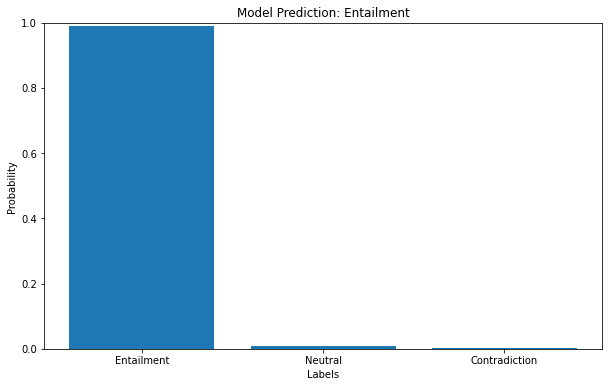

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_prediction(example_text_a, example_text_b, model, tokenizer):
    encoded_input = tokenizer.encode_plus(
        text=example_text_a,
        text_pair=example_text_b,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_token_type_ids=True,
        return_tensors='tf'
    )

    predictions = model({
        'input_ids': encoded_input['input_ids'],
        'attention_mask': encoded_input['attention_mask'],
        'token_type_ids': encoded_input['token_type_ids']
    })
    
    labels = ['Entailment', 'Neutral', 'Contradiction']
    pred_label = np.argmax(predictions.logits, axis=1)[0]
    
    plt.figure(figsize=(10, 6))
    plt.bar(labels, tf.nn.softmax(predictions.logits, axis=1).numpy()[0])
    plt.title(f"Model Prediction: {labels[pred_label]}")
    plt.xlabel("Labels")
    plt.ylabel("Probability")
    plt.ylim([0, 1])
    plt.show()

example_text_a = "The cat sat on the mat."
example_text_b = "A cat is sitting on a mat."

plot_prediction(example_text_a, example_text_b, model, tokenizer)

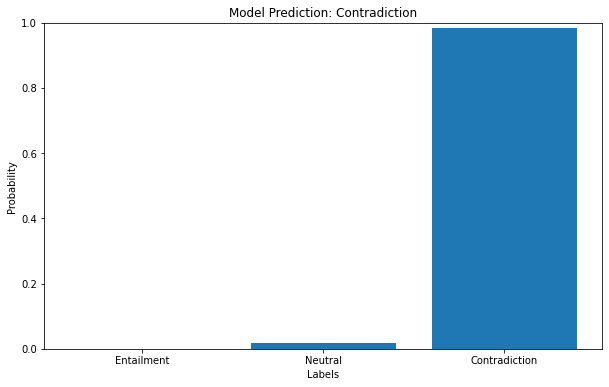

In [10]:
example_text_a = "The weather is sunny and warm today."
example_text_b = "It is raining heavily right now."

plot_prediction(example_text_a, example_text_b, model, tokenizer)